# Exploratory Data Analysis (EDA) for Sales Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


In [2]:
# Configure visualization
sns.set_theme()

# Load dataset
file_path = "sales_data.csv"
df = pd.read_csv(file_path)

Let's look on the data

In [3]:
# Display basic info
df.head()

,Unnamed: 0,shop_id,date,item_name,n_sold,price,promotion,category
0,0,1,2021-01-02,cucumber,367.0,8.50,False,Vegetables
1,1,1,2021-01-02,bun,947.0,3.61,False,Bakery
2,2,1,2021-01-02,salad,459.0,9.90,False,Vegetables
3,3,1,2021-01-02,baguette,1343.0,3.90,False,Bakery
4,4,1,2021-01-03,cucumber,391.0,8.50,False,Vegetables


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3229 entries, 0 to 3228
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3229 non-null   int64  
 1   shop_id     3229 non-null   int64  
 2   date        3229 non-null   object 
 3   item_name   3229 non-null   object 
 4   n_sold      3227 non-null   float64
 5   price       3229 non-null   float64
 6   promotion   3229 non-null   bool   
 7   category    3229 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 179.9+ KB


In [5]:
# Drop unnecessary column, ignore errors if the column does not exist
df = df.drop(columns=["Unnamed: 0"], errors="ignore")

# Convert date from object to datetime so the code can handle it as a date
df["date"] = pd.to_datetime(df["date"])

In [6]:
# Check it
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3229 entries, 0 to 3228
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   shop_id    3229 non-null   int64         
 1   date       3229 non-null   datetime64[ns]
 2   item_name  3229 non-null   object        
 3   n_sold     3227 non-null   float64       
 4   price      3229 non-null   float64       
 5   promotion  3229 non-null   bool          
 6   category   3229 non-null   object        
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 154.6+ KB


In [7]:
# Categorical data
df.describe(include="object")

,item_name,category
count,3229,3229
unique,4,2
top,bun,Bakery
freq,902,1803


In [8]:
# Numerical data
df.describe()

,shop_id,date,n_sold,price
count,3229.000000,3229,3227.000000,3229.000000
mean,1.499535,2021-07-29 17:43:09.903995136,1830.472265,6.142948
min,1.000000,2021-01-02 00:00:00,-295.000000,0.000000
25%,1.000000,2021-04-14 00:00:00,650.000000,3.900000
50%,1.000000,2021-07-26 00:00:00,1242.000000,4.500000
75%,2.000000,2021-11-06 00:00:00,2458.000000,8.500000
max,2.000000,2022-04-15 00:00:00,77600.000000,39.000000
std,0.500077,NaN,2213.719258,2.579138


# Nunber of items sold

It seems there are some issues in n_sold. Values go from negative to almost 80 000, price 0 also seems suspicious and there are 2 null values. Let's visualize the data first.

In [9]:
# Show all rows that contain at least one missing value
df[df.isnull().any(axis=1)]

,shop_id,date,item_name,n_sold,price,promotion,category
590,1,2021-06-01,salad,NaN,9.9,False,Vegetables
2500,2,2021-08-14,baguette,NaN,3.9,False,Bakery


In [10]:
# Set the visual theme and the size of the plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

In [11]:
# Create a function so we can reuse it for both shops
def plot_shop_sales_with_promotions(dataframe, shop_id):
    """
    Generates a line plot of daily sales for a specific shop,
    with markers for promotions.
    """
    # --- 1. Filter data for the specific shop ---
    df_shop = dataframe[dataframe['shop_id'] == shop_id].copy()

    # --- 2. Aggregate sales data for the line plot ---
    daily_item_sales = df_shop.groupby(['date', 'item_name'])['n_sold'].sum().reset_index()

    # --- 3. Get data for promotion markers ---
    # Find the dates and items where a promotion occurred
    promotion_dates = df_shop[df_shop['promotion'] == True][['date', 'item_name']].drop_duplicates()
    # Merge with daily sales to get the correct y-value (n_sold) for the markers
    promotion_markers = pd.merge(promotion_dates, daily_item_sales, on=['date', 'item_name'])


    # --- 4. Create the Plot ---
    plt.figure(figsize=(14, 7))

    # Create the base line plot
    sns.lineplot(
        data=daily_item_sales,
        x='date',
        y='n_sold',
        hue='item_name'
    )

    # Overlay the scatter plot markers for promotions
    sns.scatterplot(
        data=promotion_markers,
        x='date',
        y='n_sold',
        hue='item_name',
        marker='X',
        s=150,          # Size of the marker
        color='black',
        legend=False    # Don't create a separate legend for markers
    )

    # --- 5. Set Title and Labels ---
    plt.title(f'Daily Sales Volume for Shop ID: {shop_id} (X marks promotions)', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Total Items Sold (n_sold)', fontsize=12)
    plt.legend(title='Item Name')
    plt.tight_layout()
    plt.show()

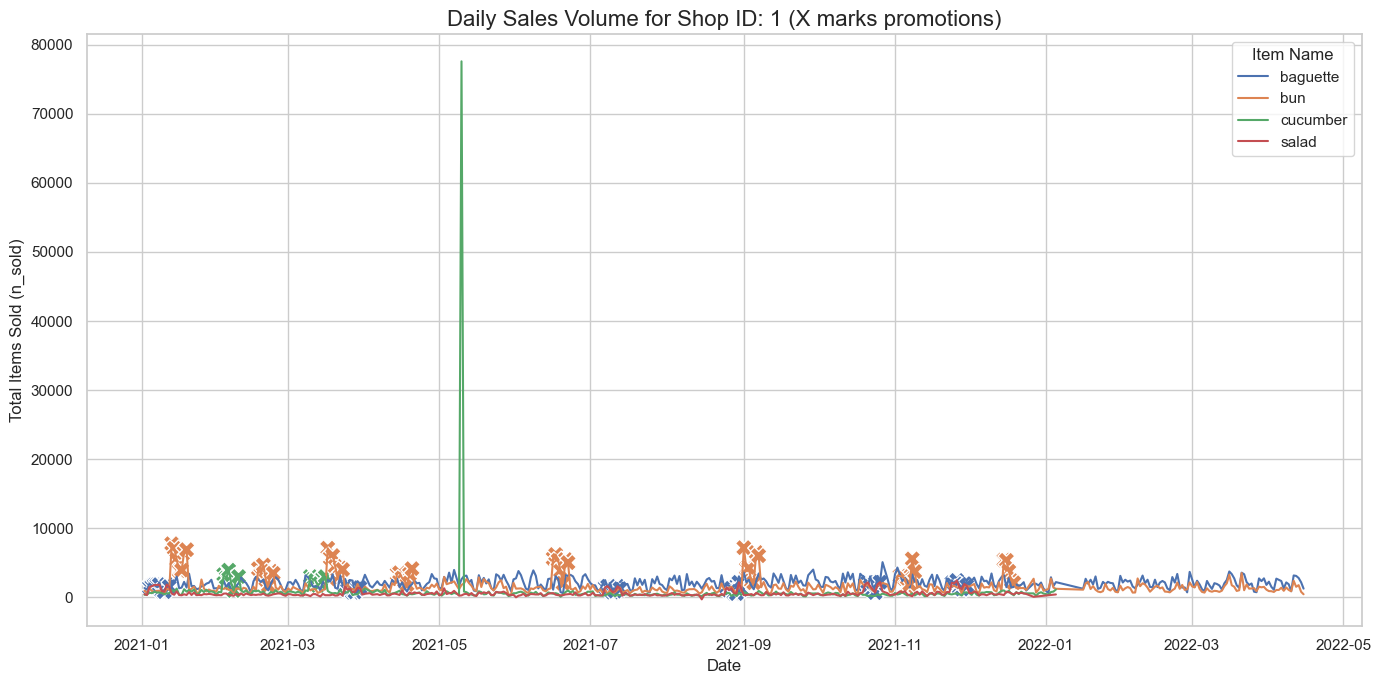

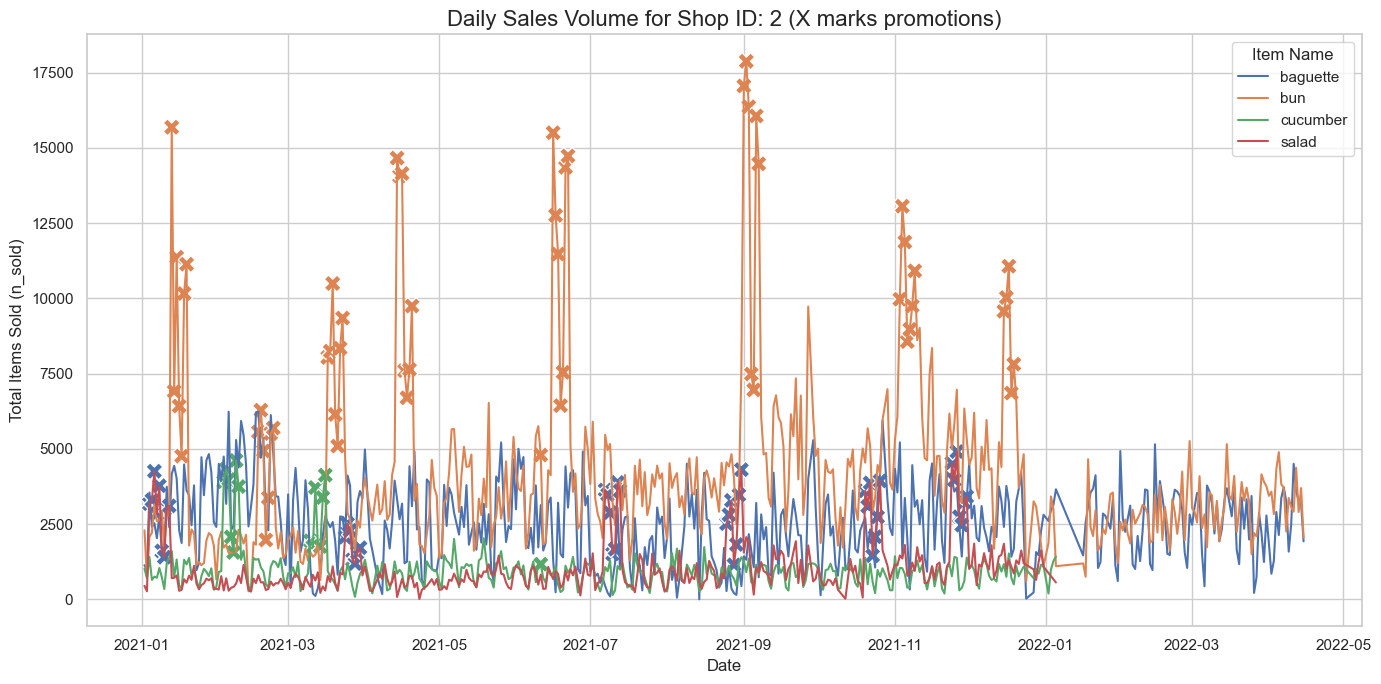

In [12]:
# Generate the graph for Shop 1
plot_shop_sales_with_promotions(df, shop_id=1)

# Generate the graph for Shop 2
plot_shop_sales_with_promotions(df, shop_id=2)

There is a significant outlier on a first graph. Let's try to explore it in more detail. We could also check the data in some interactive visualization like plotly but I think this will be easier for now.

In [13]:
# Create a new DataFrame for Shop ID 1, Item 'cucumber', between 2021-04-01 and 2021-06-30 so it is easier to look at
filtered_df = df[
    (df['shop_id'] == 1) &
    (df['item_name'] == 'cucumber') &
    (df['date'] >= '2021-04-20') &
    (df['date'] <= '2021-05-31')
].copy()

# Display the filtered DataFrame
pd.set_option('display.max_rows', None)
print(filtered_df)
pd.reset_option('display.max_rows')

     shop_id       date item_name   n_sold  price  promotion    category
424        1 2021-04-20  cucumber    436.0    8.5      False  Vegetables
428        1 2021-04-21  cucumber    492.0    8.5      False  Vegetables
432        1 2021-04-22  cucumber    632.0    8.5      False  Vegetables
436        1 2021-04-23  cucumber    696.0    8.5      False  Vegetables
440        1 2021-04-24  cucumber    337.0    8.5      False  Vegetables
444        1 2021-04-25  cucumber    410.0    8.5      False  Vegetables
448        1 2021-04-26  cucumber    884.0    8.5      False  Vegetables
452        1 2021-04-27  cucumber    619.0    8.5      False  Vegetables
456        1 2021-04-28  cucumber    476.0    8.5      False  Vegetables
460        1 2021-04-29  cucumber    368.0    8.5      False  Vegetables
464        1 2021-04-30  cucumber    565.0    8.5      False  Vegetables
468        1 2021-05-01  cucumber    470.0    8.5      False  Vegetables
472        1 2021-05-02  cucumber    244.0    8.5  

The problem is in a row with index 500. It seems the number of cucumbers sold is 100 times higher than it was supposed to be. In real life I would try to check if there is an easy way how to look into other sources and what is the number of products sold there. Here I think I will decrease the amount 100 fold because the number seems quite similar to other mondays so it seems logical the true number really should be 100 times lower.

I wouldn't identify the rows by index in production code but here it is the easiest solution.

In [14]:
# Display the original row (for comparison)
print("--- Original row at index 500: ---")
print(df.loc[500])

# Create a copy of the original DataFrame to avoid modifying it directly
df2 = df.copy()

# Divide 'n_sold' by 100 for the row with index 500 and make the change to another DataFrame so we have the original data intact
df2.loc[500, 'n_sold'] = df2.loc[500, 'n_sold'] / 100

# Display the modified row to confirm the change
print("\n--- Modified row at index 500: ---")
print(df2.loc[500])

--- Original row at index 500: ---
shop_id                        1
date         2021-05-10 00:00:00
item_name               cucumber
n_sold                   77600.0
price                        8.5
promotion                  False
category              Vegetables
Name: 500, dtype: object

--- Modified row at index 500: ---
shop_id                        1
date         2021-05-10 00:00:00
item_name               cucumber
n_sold                     776.0
price                        8.5
promotion                  False
category              Vegetables
Name: 500, dtype: object


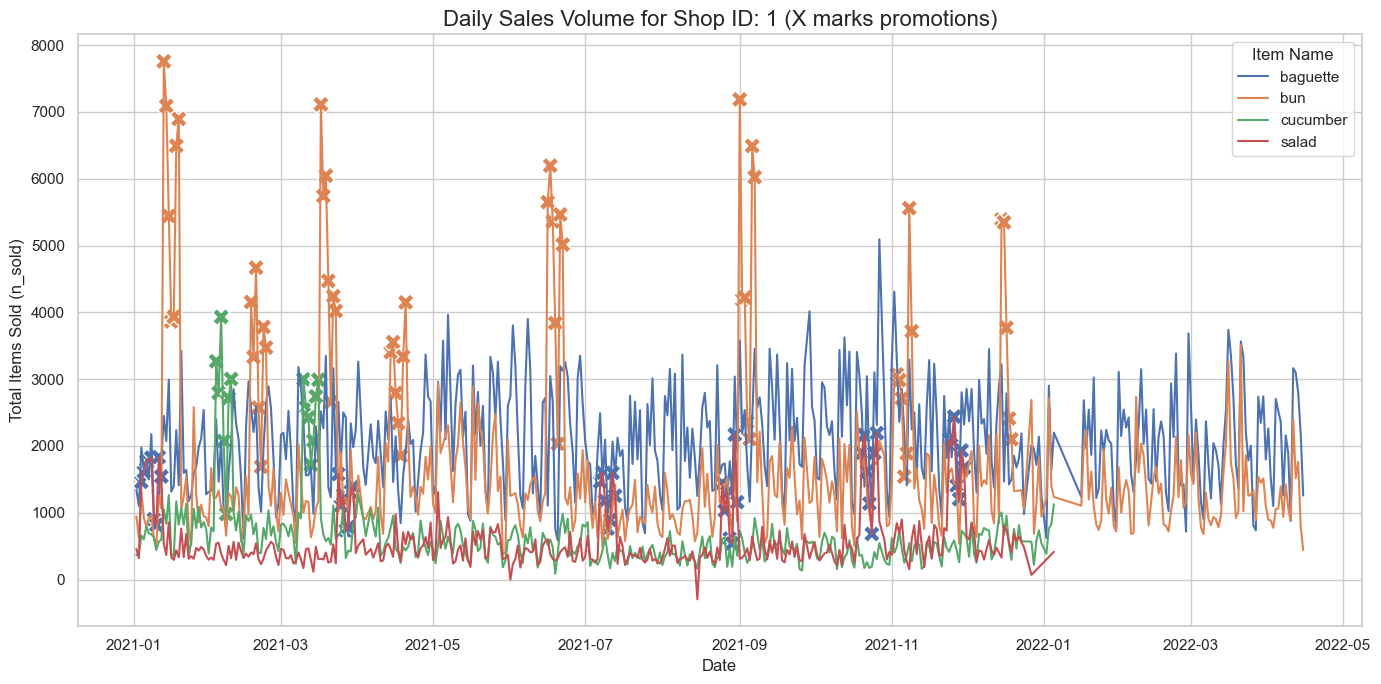

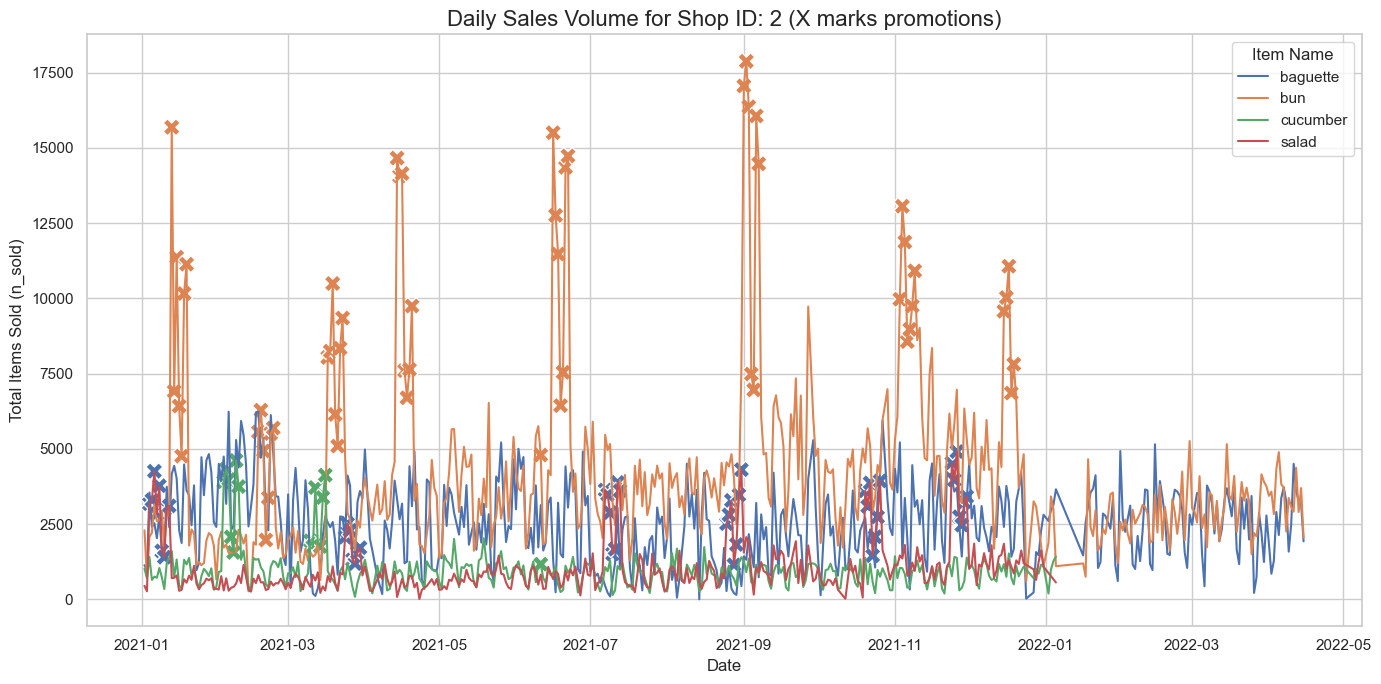

In [15]:
# Check the visualization again
# Generate the graph for Shop 1
plot_shop_sales_with_promotions(df2, shop_id=1)

# Generate the graph for Shop 2
plot_shop_sales_with_promotions(df2, shop_id=2)

The graphs look much better now. But there is still an issue with negative values.

In [16]:
negative_n_sold = df2[df2['n_sold'] < 0].copy()
print(negative_n_sold)

     shop_id       date item_name  n_sold  price  promotion    category
890        1 2021-08-15     salad  -295.0   9.45      False  Vegetables


There is only 1 such case so we can look at other data and try to figure out what is the issue. Again in real life I would try to get additional information.

In [17]:
# Create a new DataFrame for Shop ID 1, Item 'cucumber', between 2021-04-01 and 2021-06-30 so it is easier to look at
filtered_df = df2[
    (df2['shop_id'] == 1) &
    (df2['item_name'] == 'salad') &
    (df2['date'] >= '2021-08-01') &
    (df2['date'] <= '2021-09-10')
].copy()

# Display the filtered DataFrame
pd.set_option('display.max_rows', None)
print(filtered_df)
pd.reset_option('display.max_rows')

     shop_id       date item_name  n_sold  price  promotion    category
834        1 2021-08-01     salad   322.0   9.90      False  Vegetables
838        1 2021-08-02     salad   464.0   9.15      False  Vegetables
842        1 2021-08-03     salad   622.0   9.53      False  Vegetables
846        1 2021-08-04     salad   357.0   9.90      False  Vegetables
850        1 2021-08-05     salad   510.0   9.90      False  Vegetables
854        1 2021-08-06     salad   509.0   8.71      False  Vegetables
858        1 2021-08-07     salad   252.0   9.90      False  Vegetables
862        1 2021-08-08     salad   312.0   9.90      False  Vegetables
866        1 2021-08-09     salad   319.0   9.90      False  Vegetables
870        1 2021-08-10     salad   358.0   9.90      False  Vegetables
874        1 2021-08-11     salad   305.0   9.90      False  Vegetables
878        1 2021-08-12     salad   285.0   8.65      False  Vegetables
882        1 2021-08-13     salad   423.0   9.34      False  Veg

It looks like the correct value but with a minus sign in front of it. Let's remove the minus sign.

In [18]:
# Display the original row (for comparison)
print("--- Original row at index 890: ---")
print(df2.loc[890])

# Multiply n_sold by -1 to get rid of the negative sign
df2.loc[890, 'n_sold'] = df2.loc[890, 'n_sold'] * -1

# Display the modified row to confirm the change
print("\n--- Modified row at index 890: ---")
print(df2.loc[890])

--- Original row at index 890: ---
shop_id                        1
date         2021-08-15 00:00:00
item_name                  salad
n_sold                    -295.0
price                       9.45
promotion                  False
category              Vegetables
Name: 890, dtype: object

--- Modified row at index 890: ---
shop_id                        1
date         2021-08-15 00:00:00
item_name                  salad
n_sold                     295.0
price                       9.45
promotion                  False
category              Vegetables
Name: 890, dtype: object


Let's check the visualization again

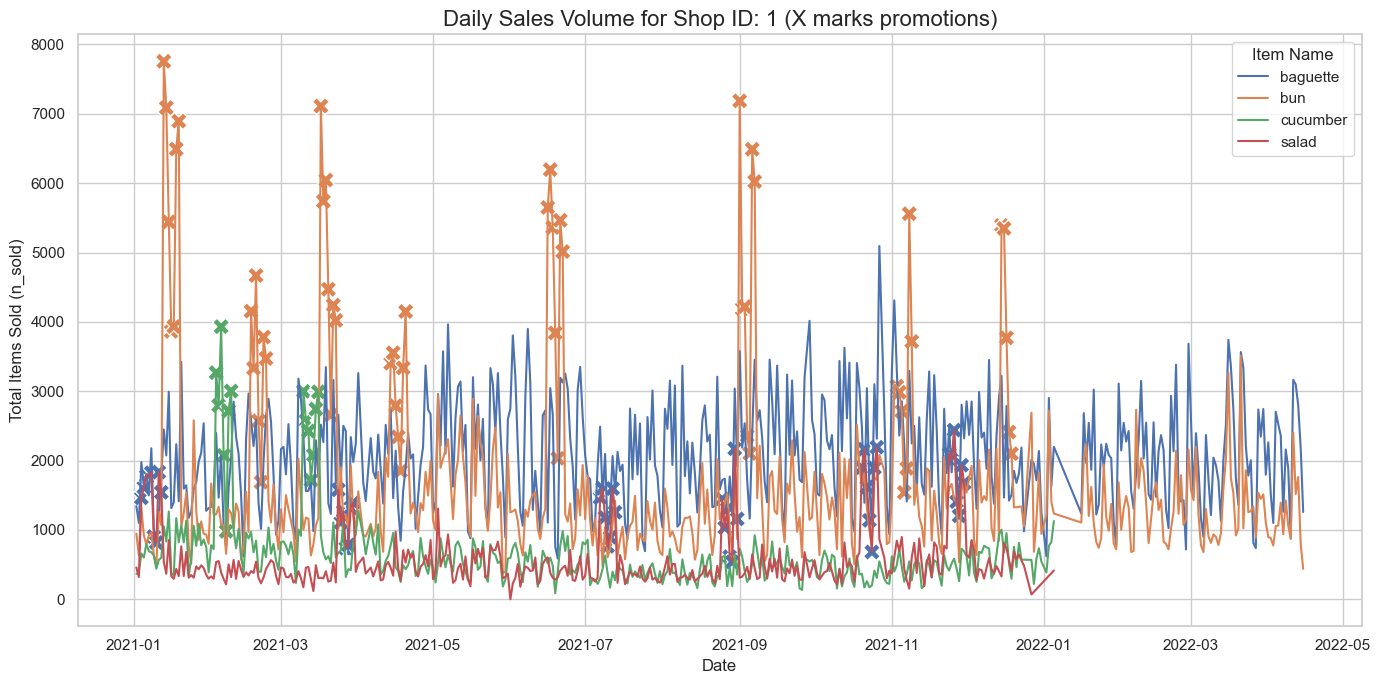

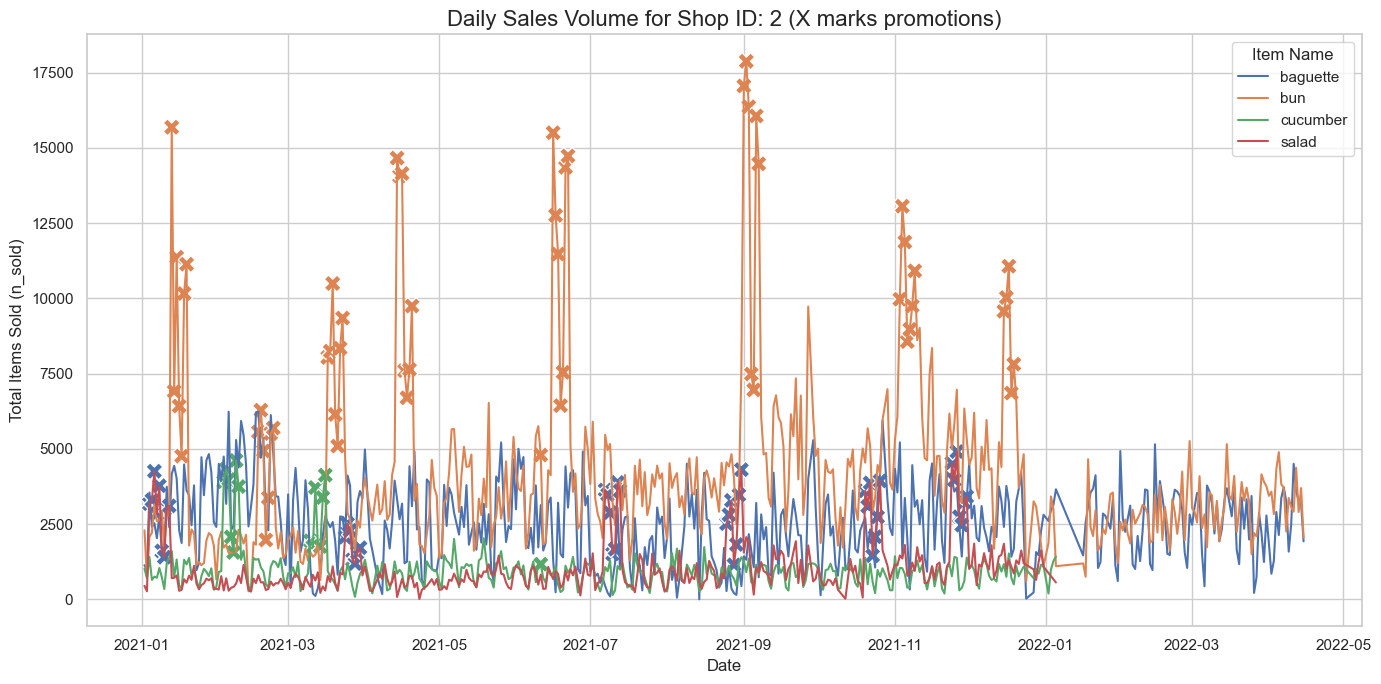

In [19]:
# Generate the graph for Shop 1
plot_shop_sales_with_promotions(df2, shop_id=1)

# Generate the graph for Shop 2
plot_shop_sales_with_promotions(df2, shop_id=2)

Let's check the data again

In [20]:
df2.describe()

,shop_id,date,n_sold,price
count,3229.000000,3229,3227.000000,3229.000000
mean,1.499535,2021-07-29 17:43:09.903995136,1806.848466,6.142948
min,1.000000,2021-01-02 00:00:00,11.000000,0.000000
25%,1.000000,2021-04-14 00:00:00,650.000000,3.900000
50%,1.000000,2021-07-26 00:00:00,1242.000000,4.500000
75%,2.000000,2021-11-06 00:00:00,2455.500000,8.500000
max,2.000000,2022-04-15 00:00:00,17878.000000,39.000000
std,0.500077,NaN,1766.369153,2.579138


Now we should solve missing values for n_sold.

In [21]:
# Show all rows that contain at least one missing value
df2[df2.isnull().any(axis=1)]

,shop_id,date,item_name,n_sold,price,promotion,category
590,1,2021-06-01,salad,NaN,9.9,False,Vegetables
2500,2,2021-08-14,baguette,NaN,3.9,False,Bakery


Salad first

In [50]:
# Create a new DataFrame for Shop ID 1, Item 'salad', between 2021-05-01 and 2021-06-30 so it is easier to look at
filtered_df = df2[
    (df2['shop_id'] == 1) &
    (df2['item_name'] == 'salad') &
    (df2['date'] >= '2021-05-01') &
    (df2['date'] <= '2021-06-30')
].copy()

# Display the filtered DataFrame
pd.set_option('display.max_rows', None)
print(filtered_df)
pd.reset_option('display.max_rows')

     shop_id       date item_name  n_sold  price  promotion    category
470        1 2021-05-01     salad   291.0    9.9      False  Vegetables
474        1 2021-05-02     salad   403.0    9.9      False  Vegetables
478        1 2021-05-03     salad  1309.0    9.9      False  Vegetables
482        1 2021-05-04     salad   474.0    9.9      False  Vegetables
486        1 2021-05-05     salad   601.0    9.9      False  Vegetables
490        1 2021-05-06     salad   638.0    9.9      False  Vegetables
494        1 2021-05-07     salad   935.0    9.9      False  Vegetables
498        1 2021-05-09     salad   239.0    9.9      False  Vegetables
502        1 2021-05-10     salad   276.0    9.9      False  Vegetables
506        1 2021-05-11     salad   449.0    9.9      False  Vegetables
510        1 2021-05-12     salad   512.0    9.9      False  Vegetables
514        1 2021-05-13     salad   285.0    9.9      False  Vegetables
518        1 2021-05-14     salad   618.0    9.9      False  Veg

Regarding the nature of data it seems good solution could be to use a mean from the same days of week around the date that is missing. It is also possible to fill blanks using something more advanced like ARIMA or gradient boosting but I would say it is an overkill for now. Fortunately there is no promotion at this time.

June 1 was a Tuesday and I think it is better to use more datapoints than just two Tuesdays around. So let's take 2 Tuesdays before our Tuesday and 2 after it (May 18 and 25 and June 8 and 15).

In [52]:
# Calculate the average from the four surrounding Tuesdays
# Define the target date and the Tuesdays to use for the average
target_date = pd.to_datetime('2021-06-01')
tuesdays_for_avg = pd.to_datetime(['2021-05-18', '2021-05-25', '2021-06-08', '2021-06-15'])

# Filter the DataFrame to get only the data for these specific Tuesdays
tuesday_sales = filtered_df[filtered_df['date'].isin(tuesdays_for_avg)]

# Calculate the mean and round it to the nearest whole number
average_tuesday_sales = round(tuesday_sales['n_sold'].mean())

print(f"Sales on the 4 Tuesdays: {tuesday_sales['n_sold'].tolist()}")
print(f"Calculated average to fill: {average_tuesday_sales}\n")

Sales on the 4 Tuesdays: [519.0, 708.0, 455.0, 573.0]
Calculated average to fill: 564



In [53]:
# Display the original row (for comparison)
print("--- Original row at index 590: ---")
print(df2.loc[590])

# Replace with our calculated average
df2.loc[590, 'n_sold'] = average_tuesday_sales

# Display the modified row to confirm the change
print("\n--- Modified row at index 590: ---")
print(df2.loc[590])

--- Original row at index 590: ---
shop_id                        1
date         2021-06-01 00:00:00
item_name                  salad
n_sold                       NaN
price                        9.9
promotion                  False
category              Vegetables
Name: 590, dtype: object

--- Modified row at index 590: ---
shop_id                        1
date         2021-06-01 00:00:00
item_name                  salad
n_sold                     564.0
price                        9.9
promotion                  False
category              Vegetables
Name: 590, dtype: object


Let's do the same for baguettes in a second store.

In [55]:
# Create a new DataFrame for Shop ID 2, Item 'baguette', between 2021-07-15 and 2021-09-15 so it is easier to look at
filtered_df = df2[
    (df2['shop_id'] == 2) &
    (df2['item_name'] == 'baguette') &
    (df2['date'] >= '2021-07-15') &
    (df2['date'] <= '2021-09-15')
].copy()

# Display the filtered DataFrame
pd.set_option('display.max_rows', None)
print(filtered_df)
pd.reset_option('display.max_rows')

      shop_id       date item_name  n_sold  price  promotion category
2380        2 2021-07-15  baguette  2724.0   3.90      False   Bakery
2384        2 2021-07-16  baguette  2758.0   3.90      False   Bakery
2388        2 2021-07-17  baguette  1056.0   3.90      False   Bakery
2392        2 2021-07-18  baguette   351.0   3.90      False   Bakery
2396        2 2021-07-19  baguette  2697.0   3.90      False   Bakery
2400        2 2021-07-20  baguette  1356.0   3.90      False   Bakery
2404        2 2021-07-21  baguette  1126.0   3.90      False   Bakery
2408        2 2021-07-22  baguette   298.0   3.90      False   Bakery
2412        2 2021-07-23  baguette  1734.0   3.90      False   Bakery
2416        2 2021-07-24  baguette  1143.0   3.90      False   Bakery
2420        2 2021-07-25  baguette  1965.0   3.74      False   Bakery
2424        2 2021-07-26  baguette  2106.0   3.90      False   Bakery
2428        2 2021-07-27  baguette   890.0   3.90      False   Bakery
2432        2 2021-0

There are no promotions either. Let's do the same as in previous case.

In [56]:
# Create a DataFrame for 'baguette' at Shop ID 2
filtered_df = df[
    (df['shop_id'] == 2) &
    (df['item_name'] == 'baguette')
].copy()


# Calculate the average from the four surrounding Saturdays
# Define the target date and the Saturdays to use for the average
target_date = pd.to_datetime('2021-08-14')
saturdays_for_avg = pd.to_datetime(['2021-07-31', '2021-08-07', '2021-08-21', '2021-08-28'])

# Filter the DataFrame to get only the data for these specific Saturdays
saturday_sales = filtered_df[filtered_df['date'].isin(saturdays_for_avg)]

# Calculate the mean and round it to the nearest whole number
average_saturday_sales = round(saturday_sales['n_sold'].mean())

# Display the Result
print(f"Sales on the 4 Saturdays: {saturday_sales['n_sold'].tolist()}")
print(f"Calculated average to fill: {average_saturday_sales}\n")

Sales on the 4 Saturdays: [1372.0, 1589.0, 967.0, 208.0]
Calculated average to fill: 1034



In [57]:
# Display the original row (for comparison)
print("--- Original row at index 2500: ---")
print(df2.loc[2500])

# Replace with our calculated average
df2.loc[2500, 'n_sold'] = average_saturday_sales

# Display the modified row to confirm the change
print("\n--- Modified row at index 2500: ---")
print(df2.loc[2500])

--- Original row at index 2500: ---
shop_id                        2
date         2021-08-14 00:00:00
item_name               baguette
n_sold                       NaN
price                        3.9
promotion                  False
category                  Bakery
Name: 2500, dtype: object

--- Modified row at index 2500: ---
shop_id                        2
date         2021-08-14 00:00:00
item_name               baguette
n_sold                    1034.0
price                        3.9
promotion                  False
category                  Bakery
Name: 2500, dtype: object


# Price

The data looks better now but in some rows there is price 0 which is suspicious. Let's visualize prices now.

In [22]:
def plot_shop_price_with_promotions(dataframe, shop_id):
    """
    Generates a line plot of daily prices for a specific shop,
    with markers for promotions.
    """
    # --- 1. Filter and Aggregate Data ---
    df_shop = dataframe[dataframe['shop_id'] == shop_id].copy()
    daily_item_price = df_shop.groupby(['date', 'item_name'])['price'].mean().reset_index()
    promotion_dates = df_shop[df_shop['promotion'] == True][['date', 'item_name']].drop_duplicates()
    promotion_markers = pd.merge(promotion_dates, daily_item_price, on=['date', 'item_name'])

    # --- 2. Create the Figure and Axes ---
    sns.set_theme(style="whitegrid")
    fig, ax = plt.subplots(figsize=(14, 7))

    # --- 3. Create the Base Line Plot ---
    sns.lineplot(
        data=daily_item_price,
        x='date',
        y='price',
        hue='item_name', # Colors are set here for the lines
        ax=ax
    )

    # --- 4. Overlay Promotion Markers
    if not promotion_markers.empty:
        sns.scatterplot(
            data=promotion_markers,
            x='date',
            y='price',
            marker='X',
            s=150,
            color='black',
            label='_nolegend_',  # Hide this from the legend
            ax=ax
        )

    # --- 5. Format the Axes and Labels ---
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.title(f'Daily Price for Shop ID: {shop_id} (X marks promotions)', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.legend(title='Item Name')
    plt.tight_layout()
    plt.show()

# --- Example of how to call the corrected function ---
# plot_shop_price_with_promotions(df, shop_id=1)

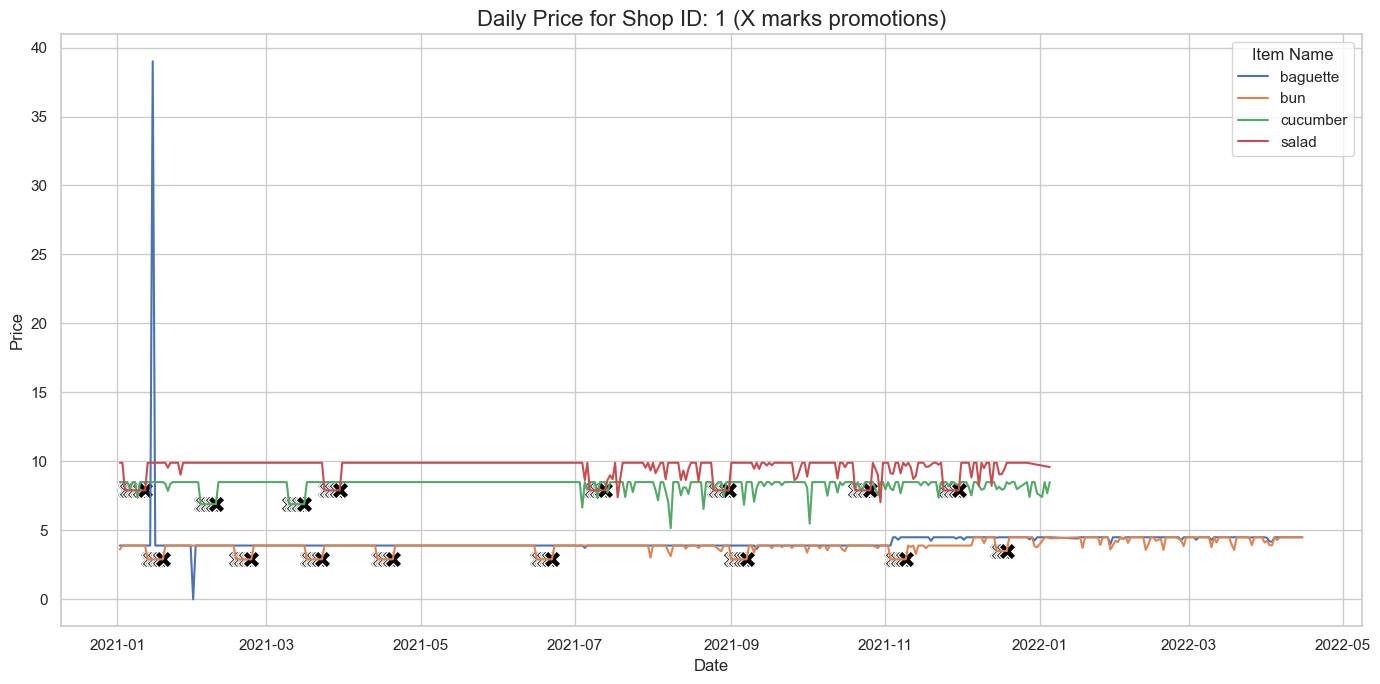

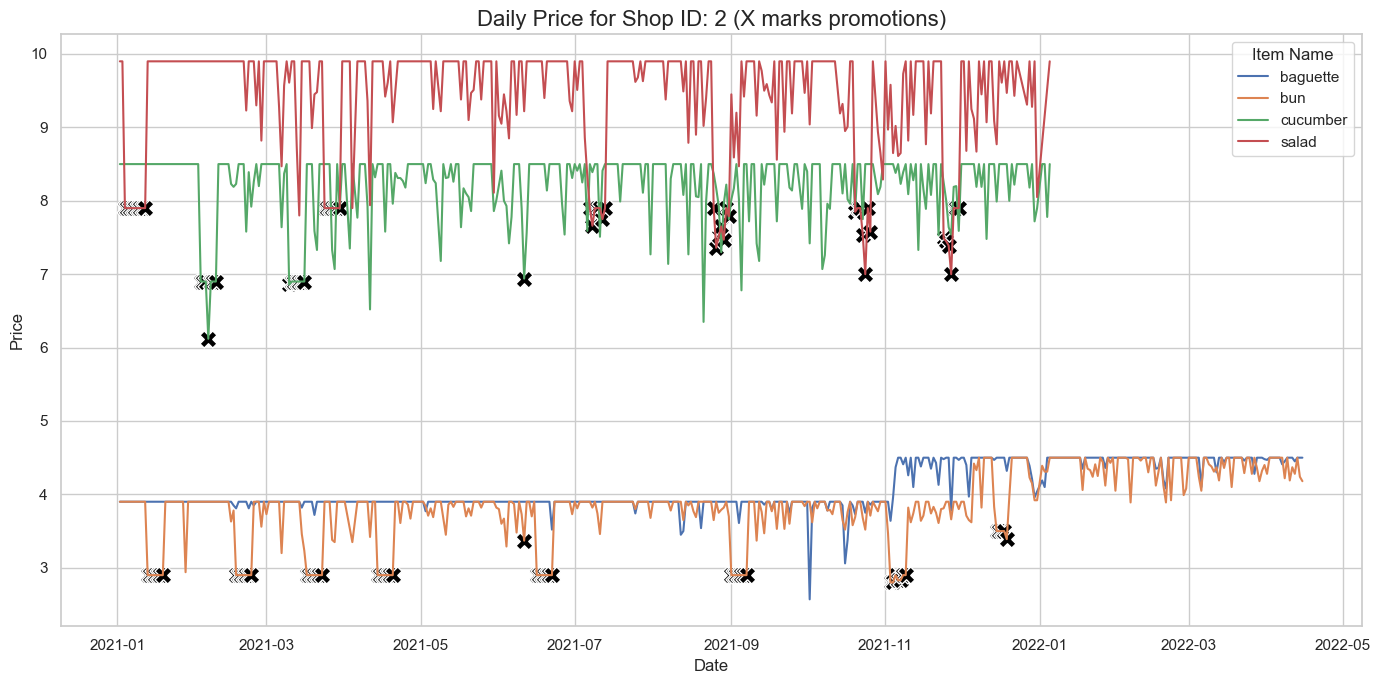

In [23]:
# Generate the price graph for Shop 1
plot_shop_price_with_promotions(df2, shop_id=1)

# Generate the price graph for Shop 2
plot_shop_price_with_promotions(df2, shop_id=2)

It seems the problem is again in the first shop this time with baguettes. Let's check if we can solve it.

In [24]:
# Create a new DataFrame for Shop ID 1, Item 'baguette', between 2021-01-01 and 2021-03-01 so it is easier to look at
filtered_df = df2[
    (df2['shop_id'] == 1) &
    (df2['item_name'] == 'baguette') &
    (df2['date'] >= '2021-01-01') &
    (df2['date'] <= '2021-03-01')
].copy()

# Display the filtered DataFrame
pd.set_option('display.max_rows', None)
print(filtered_df)
pd.reset_option('display.max_rows')

     shop_id       date item_name  n_sold  price  promotion category
3          1 2021-01-02  baguette  1343.0    3.9      False   Bakery
7          1 2021-01-03  baguette  1102.0    3.9      False   Bakery
11         1 2021-01-04  baguette  1978.0    3.9      False   Bakery
15         1 2021-01-05  baguette  1646.0    3.9      False   Bakery
19         1 2021-01-06  baguette  1806.0    3.9      False   Bakery
23         1 2021-01-07  baguette  1499.0    3.9      False   Bakery
27         1 2021-01-08  baguette  2178.0    3.9      False   Bakery
31         1 2021-01-09  baguette  1016.0    3.9      False   Bakery
35         1 2021-01-10  baguette   793.0    3.9      False   Bakery
39         1 2021-01-11  baguette  1215.0    3.9      False   Bakery
43         1 2021-01-12  baguette  1777.0    3.9      False   Bakery
47         1 2021-01-13  baguette  2449.0    3.9      False   Bakery
51         1 2021-01-14  baguette  2074.0    3.9      False   Bakery
55         1 2021-01-15  baguette 

On 2021-01-15 there is price 39 and on 2021-01-31 there is price 0. This time it truly seems as a mistake when entering the data. Let's fix it.

In [25]:
# 2021-01-15
# Display the original row (for comparison)
print("--- Original row at index 55: ---")
print(df2.loc[55])

# Multiply n_sold by -1 to get rid of the negative sign
df2.loc[55, 'price'] = 3.9

# Display the modified row to confirm the change
print("\n--- Modified row at index 55: ---")
print(df2.loc[55])

--- Original row at index 55: ---
shop_id                        1
date         2021-01-15 00:00:00
item_name               baguette
n_sold                    2993.0
price                       39.0
promotion                  False
category                  Bakery
Name: 55, dtype: object

--- Modified row at index 55: ---
shop_id                        1
date         2021-01-15 00:00:00
item_name               baguette
n_sold                    2993.0
price                        3.9
promotion                  False
category                  Bakery
Name: 55, dtype: object


In [26]:
# 2021-01-31
# Display the original row (for comparison)
print("--- Original row at index 119: ---")
print(df2.loc[119])

# Multiply n_sold by -1 to get rid of the negative sign
df2.loc[119, 'price'] = 3.9

# Display the modified row to confirm the change
print("\n--- Modified row at index 119: ---")
print(df2.loc[119])

--- Original row at index 119: ---
shop_id                        1
date         2021-01-31 00:00:00
item_name               baguette
n_sold                    1314.0
price                        0.0
promotion                  False
category                  Bakery
Name: 119, dtype: object

--- Modified row at index 119: ---
shop_id                        1
date         2021-01-31 00:00:00
item_name               baguette
n_sold                    1314.0
price                        3.9
promotion                  False
category                  Bakery
Name: 119, dtype: object


Let's look at the graphs again.

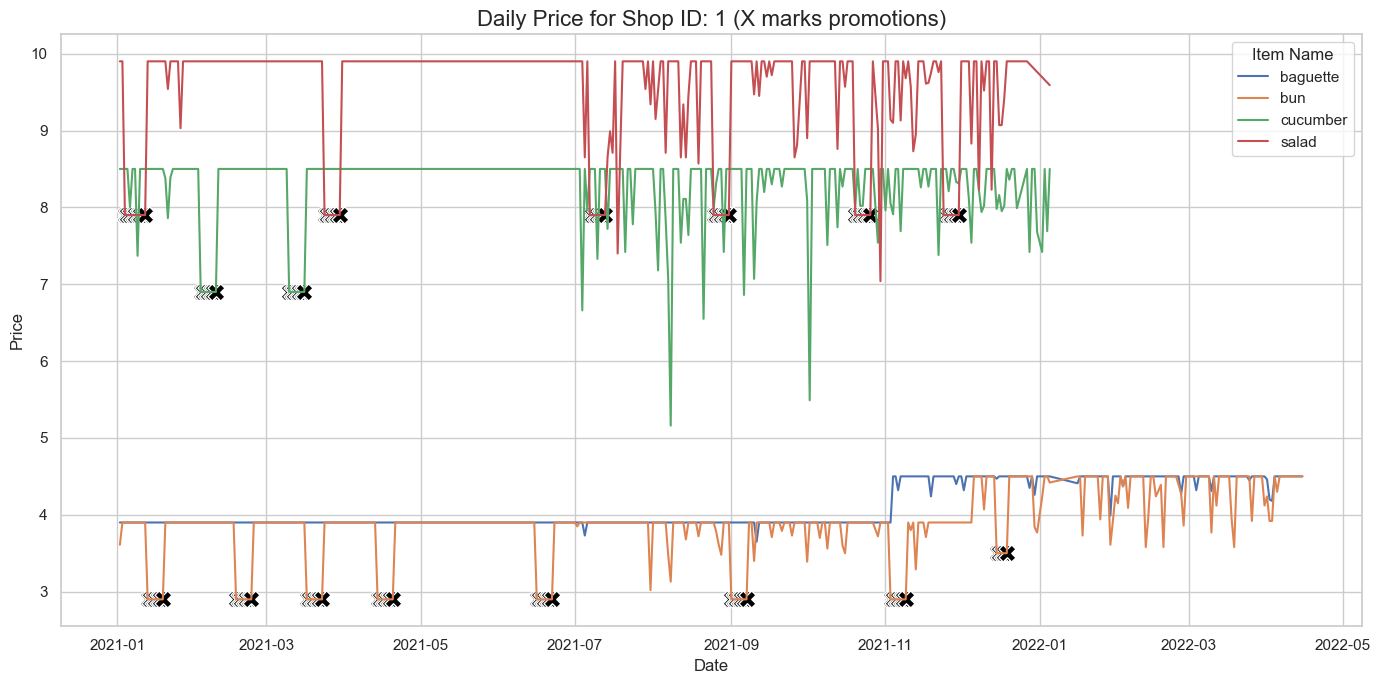

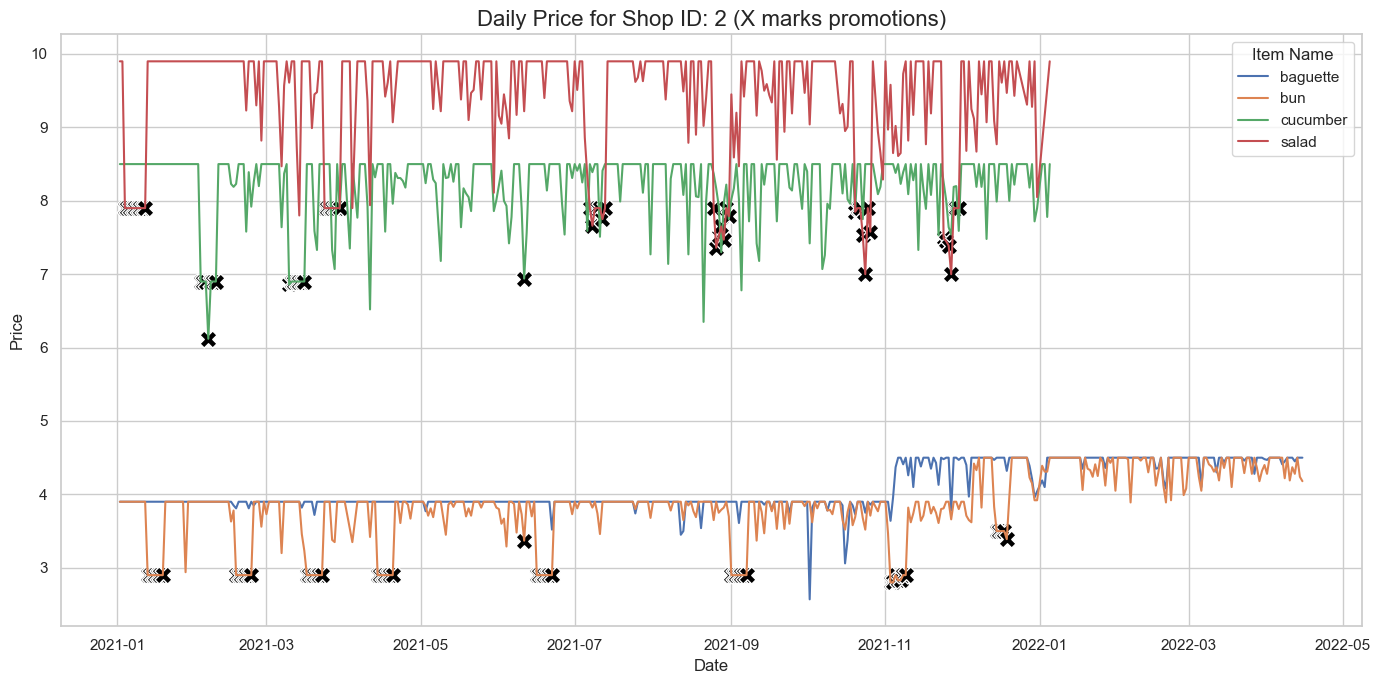

In [27]:
# Generate the price graph for Shop 1
plot_shop_price_with_promotions(df2, shop_id=1)

# Generate the price graph for Shop 2
plot_shop_price_with_promotions(df2, shop_id=2)

It seems that the prices are fixed.

Look for duplicates

In [28]:
# Group by the three columns and count the number of occurrences for each group
duplicate_check = df2.groupby(['shop_id', 'date', 'item_name']).size().reset_index(name='count')

# Filter to find groups with a count greater than 1 (which indicates duplicates)
duplicates_found = duplicate_check[duplicate_check['count'] > 1]

# Display the result
if duplicates_found.empty:
    print("No duplicate rows found for any combination of shop, day, and item name.")
else:
    print("The following combinations of shop, day, and item name have duplicate rows:")
    print(duplicates_found)

No duplicate rows found for any combination of shop, day, and item name.


In [29]:
low_price_df = df2[df2['price'] < 2]
print(low_price_df)

Empty DataFrame
Columns: [shop_id, date, item_name, n_sold, price, promotion, category]
Index: []


This seems like another error in the data. Let's look at prices of baguettes in shop_id 1 so we can estimate actual price. In real life if it wouldn't take long, we could try to find the real price in other data sources.

In [30]:
# Create a new DataFrame for Shop ID 1, Item 'baguette', between 2021-01-15 and 2021-02-15 so it is easier to look at
filtered_df = df[
    (df['shop_id'] == 1) &
    (df['item_name'] == 'baguette') &
    (df['date'] >= '2021-01-15') &
    (df['date'] <= '2021-02-15')
].copy()

# Display the filtered DataFrame
pd.set_option('display.max_rows', None)
print(filtered_df)
pd.reset_option('display.max_rows')

     shop_id       date item_name  n_sold  price  promotion category
55         1 2021-01-15  baguette  2993.0   39.0      False   Bakery
59         1 2021-01-16  baguette  1315.0    3.9      False   Bakery
63         1 2021-01-17  baguette  1400.0    3.9      False   Bakery
67         1 2021-01-18  baguette  2236.0    3.9      False   Bakery
71         1 2021-01-19  baguette  1413.0    3.9      False   Bakery
75         1 2021-01-20  baguette  3423.0    3.9      False   Bakery
79         1 2021-01-21  baguette  1596.0    3.9      False   Bakery
83         1 2021-01-22  baguette  1644.0    3.9      False   Bakery
87         1 2021-01-23  baguette  1175.0    3.9      False   Bakery
91         1 2021-01-24  baguette  1266.0    3.9      False   Bakery
95         1 2021-01-25  baguette  1593.0    3.9      False   Bakery
99         1 2021-01-26  baguette  1687.0    3.9      False   Bakery
103        1 2021-01-27  baguette  1983.0    3.9      False   Bakery
107        1 2021-01-28  baguette 

In [31]:
# TODO finish 0 price

In [32]:
# TODO null values

In [33]:
# TODO Missing dates

We could drop the rows with missing values but we would get gaps in time series so I think it will be better to try to fill them. Let's check the null values.

## Data Cleaning

In [34]:

# Drop unnecessary column, ignore errors if the column does not exist
df = df.drop(columns=["Unnamed: 0"], errors="ignore")

# Convert date from object to datetime so the code can handle it as a date
df["date"] = pd.to_datetime(df["date"])

# Show all rows that contain at least one missing value
df[df.isnull().any(axis=1)]

,shop_id,date,item_name,n_sold,price,promotion,category
590,1,2021-06-01,salad,NaN,9.9,False,Vegetables
2500,2,2021-08-14,baguette,NaN,3.9,False,Bakery


We could drop the rows with missing values but I think it will be better to try to fill them. 

In [35]:
# Convert the n_sold column to an integer because it has to be whole numbers
df['n_sold'] = df['n_sold'].replace(np.nan, 0)  # Replace NaN with 0 before conversion

In [36]:

# Fill missing values in n_sold with median
df["n_sold"] = df["n_sold"].fillna(df["n_sold"].median())


## Descriptive Statistics

In [37]:
df.describe(include=['object'])

,item_name,category
count,3229,3229
unique,4,2
top,bun,Bakery
freq,902,1803


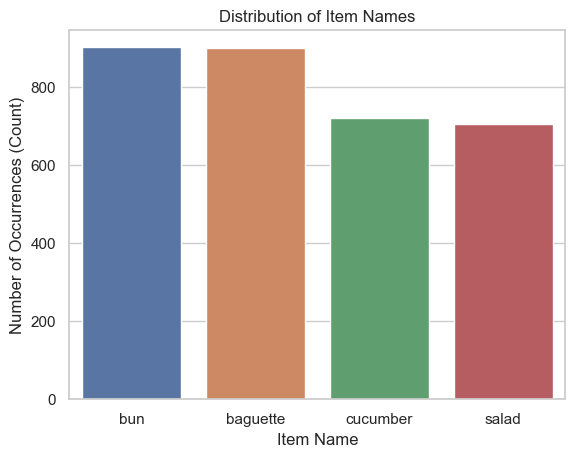

In [38]:
sns.countplot(
    data=df,
    x='item_name',
    order=df['item_name'].value_counts().index
)

# Set the title and labels
plt.title('Distribution of Item Names')
plt.xlabel('Item Name')
plt.ylabel('Number of Occurrences (Count)')
plt.show()

In [39]:
# Group by date and item_name, then SUM the 'n_sold' for each group
daily_item_sales = df.groupby(['date', 'item_name'])['n_sold'].sum().reset_index()

# Display the first few rows of the aggregated data
daily_item_sales.head()

,date,item_name,n_sold
0,2021-01-02,baguette,2477.0
1,2021-01-02,bun,3240.0
2,2021-01-02,cucumber,1383.0
3,2021-01-02,salad,908.0
4,2021-01-03,baguette,2069.0


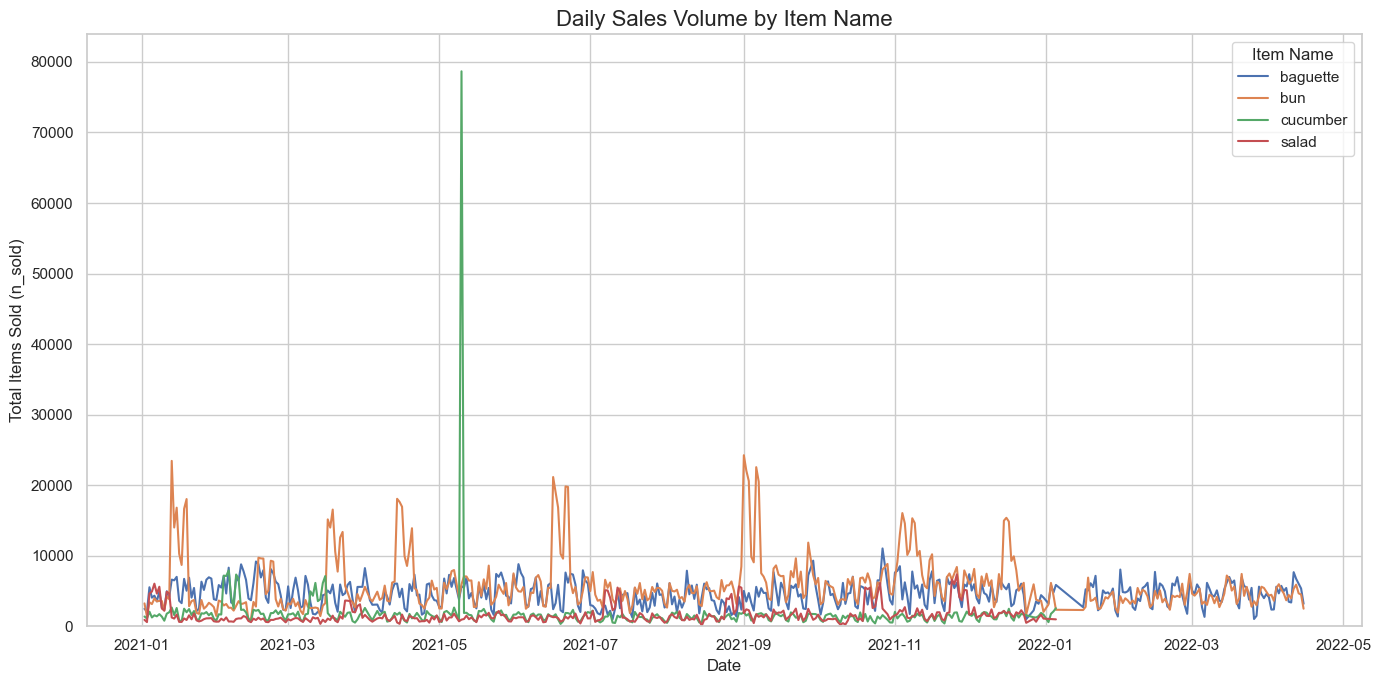

In [40]:
# Set the visual theme and the size of the plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 7))

# --- Create the line plot with item_names differentiated by color ---
sns.lineplot(
    data=daily_item_sales,
    x='date',
    y='n_sold',
    hue='item_name'  # Differentiates each item_name with a unique color
)

# --- Set a reasonable Y-axis limit to exclude extreme outliers ---
# Calculate the 99th percentile to find a reasonable upper bound
reasonable_limit = daily_item_sales['n_sold'].quantile(0.99)
plt.ylim(0, reasonable_limit * 5) # Set the limit slightly above the 99th percentile

# --- Set the title and labels ---
plt.title('Daily Sales Volume by Item Name', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Items Sold (n_sold)', fontsize=12)
plt.legend(title='Item Name')

# Display the plot
plt.tight_layout()
plt.show()

In [41]:
def plot_shop_sales_with_promotions(dataframe, shop_id):
    """
    Generates a line plot of daily sales for a specific shop,
    with markers for promotions.
    """
    # --- 1. Filter data for the specific shop ---
    df_shop = dataframe[dataframe['shop_id'] == shop_id].copy()

    # --- 2. Aggregate sales data for the line plot ---
    daily_item_sales = df_shop.groupby(['date', 'item_name'])['n_sold'].sum().reset_index()

    # --- 3. Get data for promotion markers ---
    # Find the dates and items where a promotion occurred
    promotion_dates = df_shop[df_shop['promotion'] == True][['date', 'item_name']].drop_duplicates()
    # Merge with daily sales to get the correct y-value (n_sold) for the markers
    promotion_markers = pd.merge(promotion_dates, daily_item_sales, on=['date', 'item_name'])


    # --- 4. Create the Plot ---
    plt.figure(figsize=(14, 7))

    # Create the base line plot
    sns.lineplot(
        data=daily_item_sales,
        x='date',
        y='n_sold',
        hue='item_name'
    )

    # Overlay the scatter plot markers for promotions
    sns.scatterplot(
        data=promotion_markers,
        x='date',
        y='n_sold',
        hue='item_name',
        marker='X',
        s=150,          # Size of the marker
        color='black',
        legend=False    # Don't create a separate legend for markers
    )

    # --- 5. Set Title and Labels ---
    plt.title(f'Daily Sales Volume for Shop ID: {shop_id} (X marks promotions)', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Total Items Sold (n_sold)', fontsize=12)
    plt.legend(title='Item Name')
    plt.tight_layout()
    plt.show()

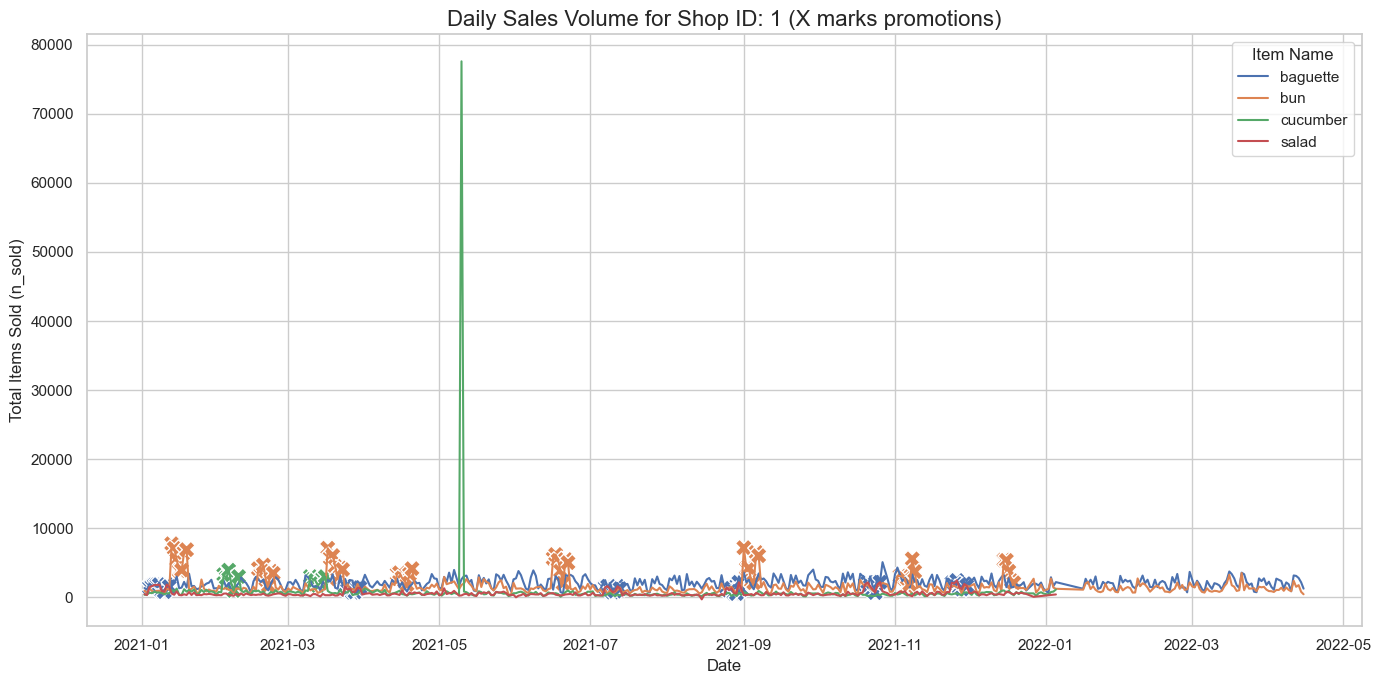

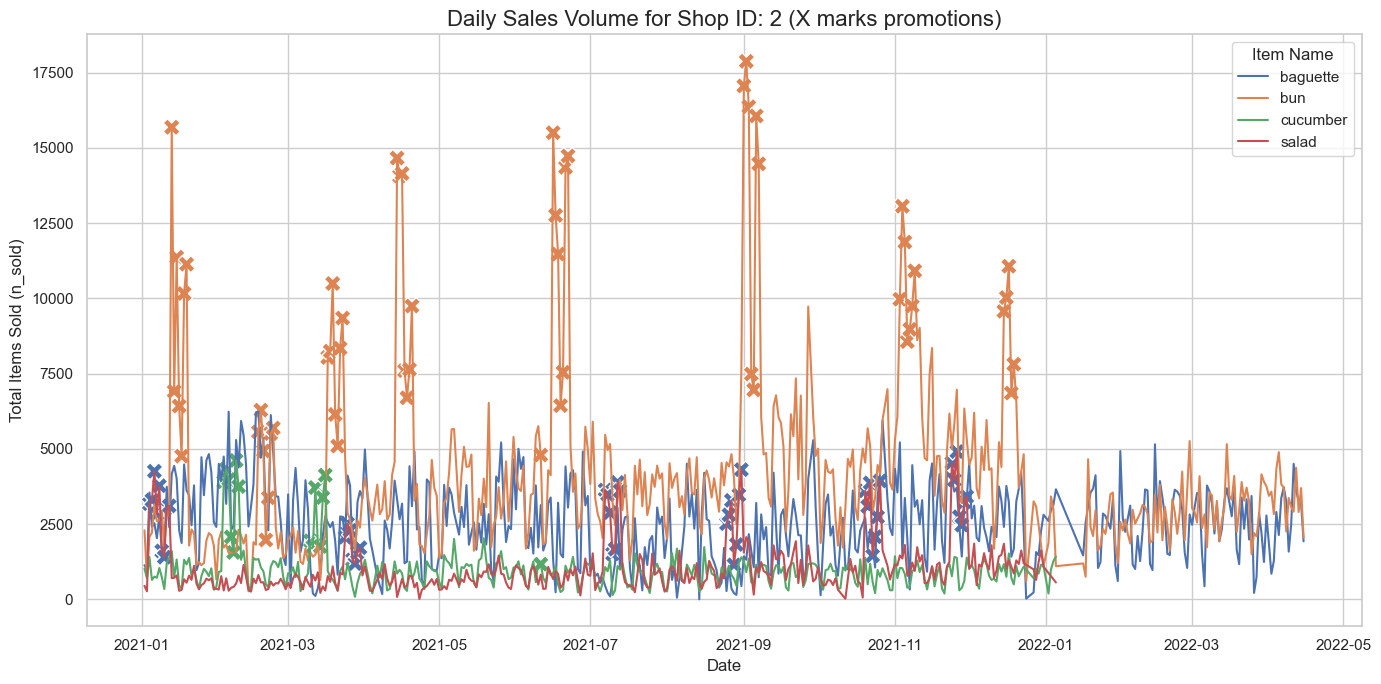

In [42]:
# Generate the graph for Shop 1
plot_shop_sales_with_promotions(df, shop_id=1)

# Generate the graph for Shop 2
plot_shop_sales_with_promotions(df, shop_id=2)

In [43]:

df.describe(include="all")


,shop_id,date,item_name,n_sold,price,promotion,category
count,3229.000000,3229,3229,3229.000000,3229.000000,3229,3229
unique,NaN,NaN,4,NaN,NaN,2,2
top,NaN,NaN,bun,NaN,NaN,False,Bakery
freq,NaN,NaN,902,NaN,NaN,3003,1803
mean,1.499535,2021-07-29 17:43:09.903995136,NaN,1829.338495,6.142948,NaN,NaN
min,1.000000,2021-01-02 00:00:00,NaN,-295.000000,0.000000,NaN,NaN
25%,1.000000,2021-04-14 00:00:00,NaN,650.000000,3.900000,NaN,NaN
50%,1.000000,2021-07-26 00:00:00,NaN,1242.000000,4.500000,NaN,NaN
75%,2.000000,2021-11-06 00:00:00,NaN,2458.000000,8.500000,NaN,NaN
max,2.000000,2022-04-15 00:00:00,NaN,77600.000000,39.000000,NaN,NaN


## Sales & Price Distributions

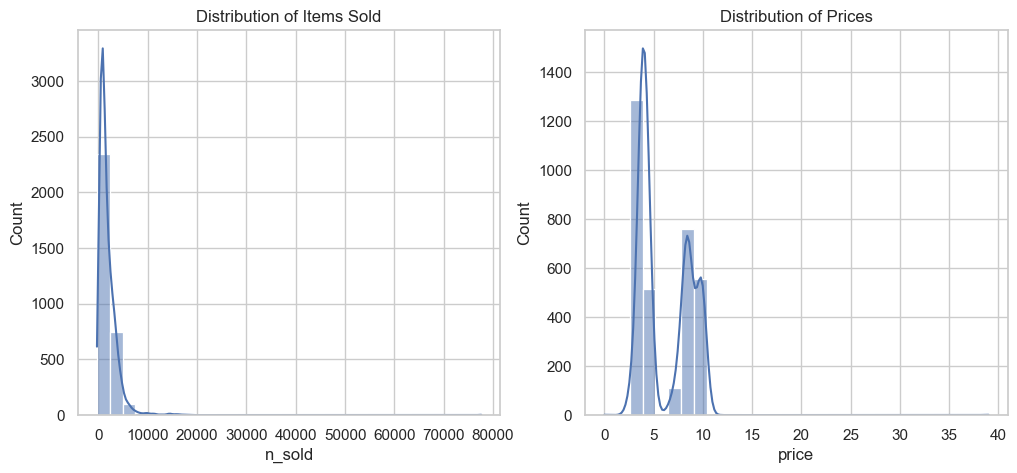

In [44]:

fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(df["n_sold"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Items Sold")

sns.histplot(df["price"], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Prices")

plt.show()


## Category Analysis

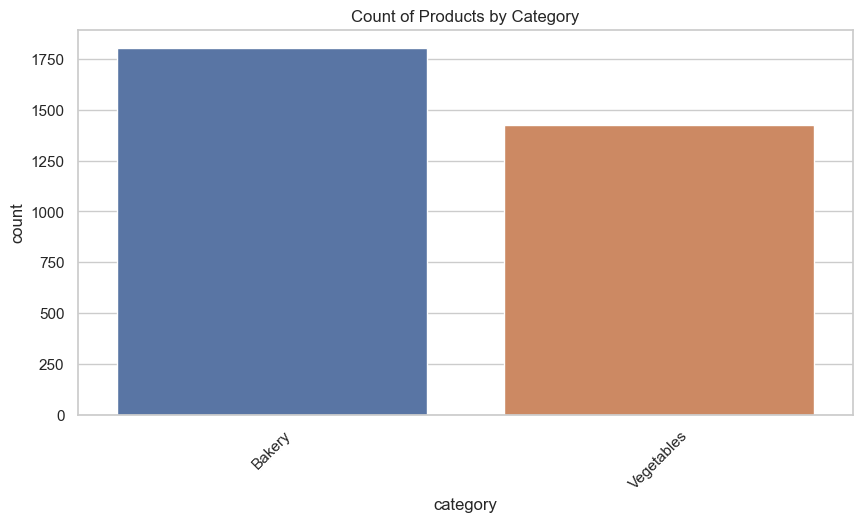

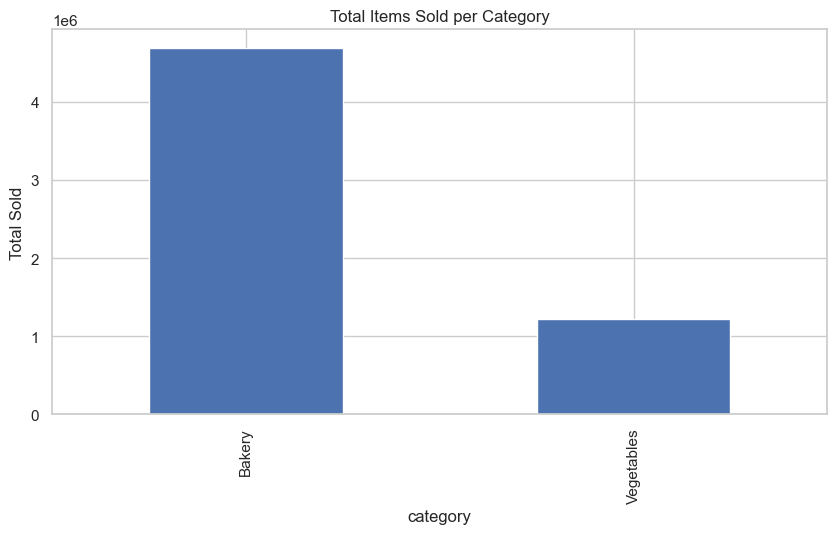

In [45]:

plt.figure(figsize=(10,5))
sns.countplot(data=df, x="category", order=df["category"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Count of Products by Category")
plt.show()

# Top-selling categories
df.groupby("category")["n_sold"].sum().sort_values(ascending=False).plot(kind="bar", figsize=(10,5))
plt.title("Total Items Sold per Category")
plt.ylabel("Total Sold")
plt.show()


## Promotion Impact on Sales

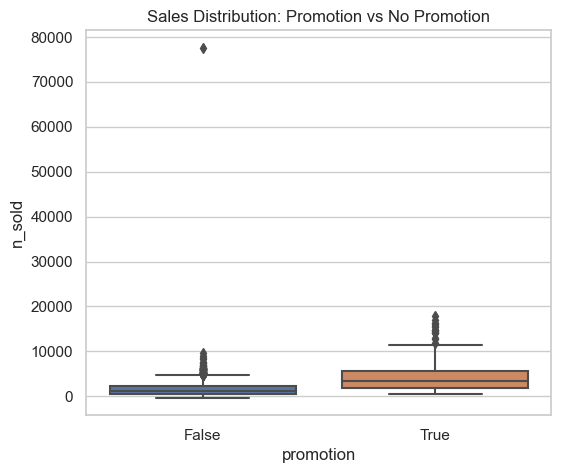

In [46]:

plt.figure(figsize=(6,5))
sns.boxplot(data=df, x="promotion", y="n_sold")
plt.title("Sales Distribution: Promotion vs No Promotion")
plt.show()


## Time Series Analysis

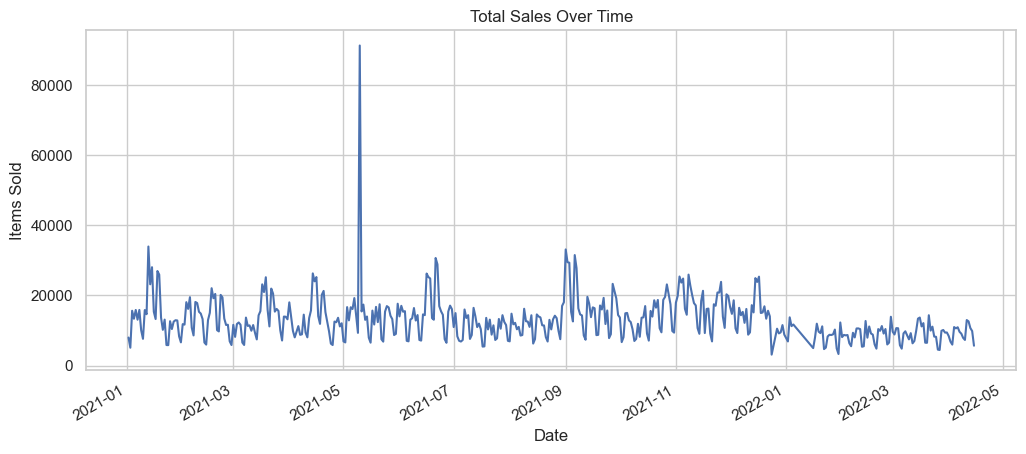

In [47]:

# Aggregate daily sales
daily_sales = df.groupby("date")["n_sold"].sum()

plt.figure(figsize=(12,5))
daily_sales.plot()
plt.title("Total Sales Over Time")
plt.ylabel("Items Sold")
plt.xlabel("Date")
plt.show()


## Shop Performance

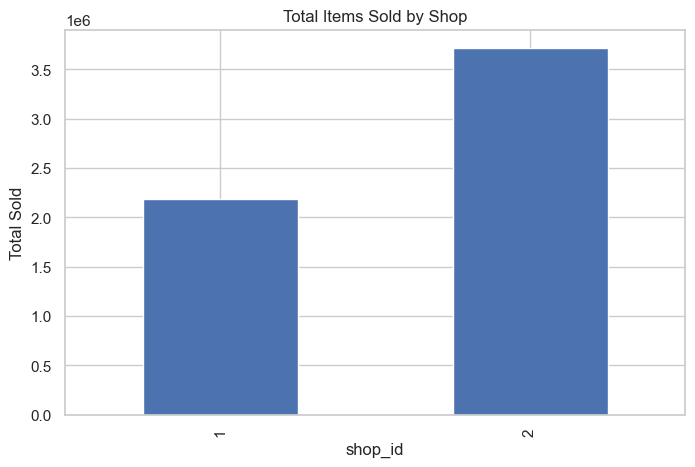

In [48]:

shop_sales = df.groupby("shop_id")["n_sold"].sum()

plt.figure(figsize=(8,5))
shop_sales.plot(kind="bar")
plt.title("Total Items Sold by Shop")
plt.ylabel("Total Sold")
plt.show()


## Correlation Analysis

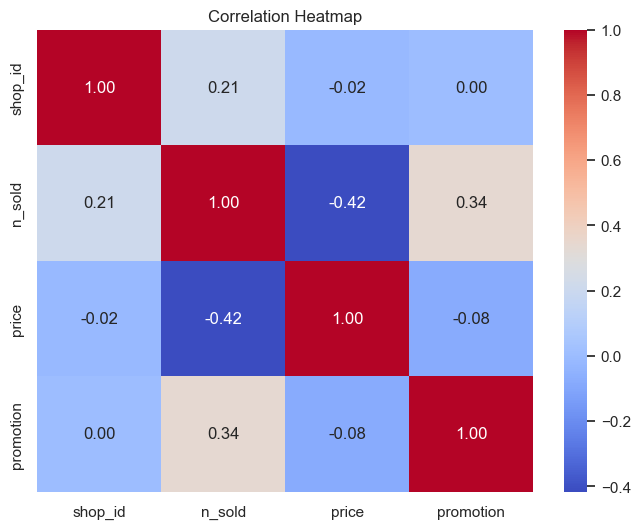

In [49]:

# Compute correlation matrix for numerical features
corr = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
